<a href="https://colab.research.google.com/github/Donalizasaji/LAB/blob/main/Dona_515_Lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Load the fine-tuned model
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Set the model to evaluation mode
model.eval()


# Function to make predictions and return sentiment label
def predict(text):
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    with torch.no_grad():
        # Get model outputs
        outputs = model(**inputs)

        logits = outputs.logits

        # Apply softmax to get probabilities
        probabilities = torch.softmax(logits, dim=-1)

        # Get the predicted class (0 for negative, 1 for positive)
        predicted_class = torch.argmax(probabilities, dim=1).item()

        # Map the class to the corresponding label
        label = "positive" if predicted_class == 1 else "negative"

    return label, probabilities


text = "The sky is blue"

# Get predictions and label
label, probabilities = predict(text)
print("Predicted Sentiment:", label)
print("Probabilities:", probabilities)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Predicted Sentiment: positive
Probabilities: tensor([[0.0012, 0.9988]])


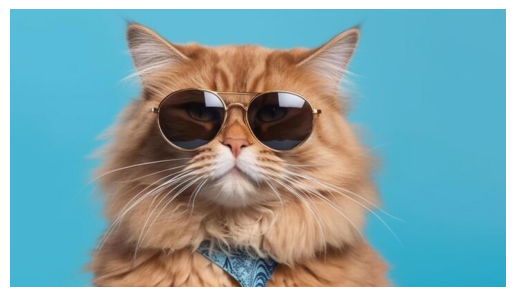

In [4]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the pre-trained CLIP model and processor
def load_pretrained_clip_model_and_processor(model_name):
    clip_processor = CLIPProcessor.from_pretrained(model_name)
    clip_model = CLIPModel.from_pretrained(model_name)
    return clip_processor, clip_model

# Handle multimodal inputs using CLIP
def handle_multimodal_inputs(text, image_path, processor, model):
    # Process the image
    image = Image.open(image_path)
    inputs = processor(
        text,
        images=image,
        return_tensors="pt",
        padding=True
    )

    # Prepare multimodal inputs
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    image_features = inputs['pixel_values']

    # Pass the inputs to the CLIP model
    outputs = model(input_ids=input_ids, attention_mask=attention_mask, pixel_values=image_features)
    return outputs, image

# Example text and image path
text = "a cat"
image_path = "/content/cat.jpg"  # actual image path

# Specify the pre-trained CLIP model
pretrained_model_name = "openai/clip-vit-base-patch16"

# Load the pre-trained CLIP processor and model
pretrained_processor, pretrained_model = load_pretrained_clip_model_and_processor(pretrained_model_name)

# Handle multimodal inputs using the pre-trained CLIP model
pretrained_outputs, image = handle_multimodal_inputs(text, image_path, pretrained_processor, pretrained_model)

# Obtain the logits from the model outputs
logits_per_image = pretrained_outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)  # Convert logits to probabilities

# Display the input image
plt.imshow(image)
plt.axis('off')
plt.show()


In [3]:

# Display the text, the predicted label, and the probability
label = pretrained_processor.tokenizer.decode(probs.argmax())
print(f"Predicted label: {label}, Probability: {probs.max().item()}")




Predicted label: !, Probability: 1.0
